## To Detect and Classify Brain Tumor using, CNN and ANN; as an asset of Deep Learning and to examine the tumor position(segmentation).

In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!cd Data && ls 

 BrainTumor	  IRIS.csv	       Salary_Data.csv
 braintumor.h5	 'iris data set'      'Shop sales Data set'
 BrainTumor.zip  'iris data set.zip'  'Shop sales Data set.zip'
 Data.csv	  nums


In [3]:
#import standard lib
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk(r"/content/drive/MyDrive/brain tumor detection/archive (2)"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
#import deep learning lib
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

2024-03-11 23:31:59.429918: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-11 23:31:59.550201: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-11 23:32:00.096714: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-11 23:32:02.463849: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [6]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('Data/BrainTumor',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [7]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(394, 150, 150, 3)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_train,Y_train,test_size=0.2,random_state=101)

In [9]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

# Convolutional Neural Network

In [10]:
#create model
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

/home/r04nx/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#compile the model
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [42]:
y_train

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [13]:
#train & test the model
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.2656 - loss: 15.6178 - val_accuracy: 0.2812 - val_loss: 1.3851
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 63s 6s/step - accuracy: 0.3503 - loss: 1.3555 - val_accuracy: 0.3438 - val_loss: 1.3847
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 68s 8s/step - accuracy: 0.2875 - loss: 1.3762 - val_accuracy: 0.1875 - val_loss: 1.3853
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 52s 6s/step - accuracy: 0.2074 - loss: 1.3755 - val_accuracy: 0.2812 - val_loss: 1.3848
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 80s 10s/step - accuracy: 0.2871 - loss: 1.3592 - val_accuracy: 0.2188 - val_loss: 1.3812
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 67s 7s/step - accuracy: 0.2757 - loss: 1.3550 - val_accuracy: 0.2812 - val_loss: 1.3634
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 74s 8s/step - accuracy: 0.2993 - loss: 1.3304 - val_accuracy: 0.4688 - val_loss: 1.2796
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 73s 8s/step - accuracy: 0.4239 - loss: 1.2217 - val_accuracy: 0.4688 - val_loss: 1.3187
Epoch 

In [15]:
#import visualisation lib
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
model.save('braintumor.keras')

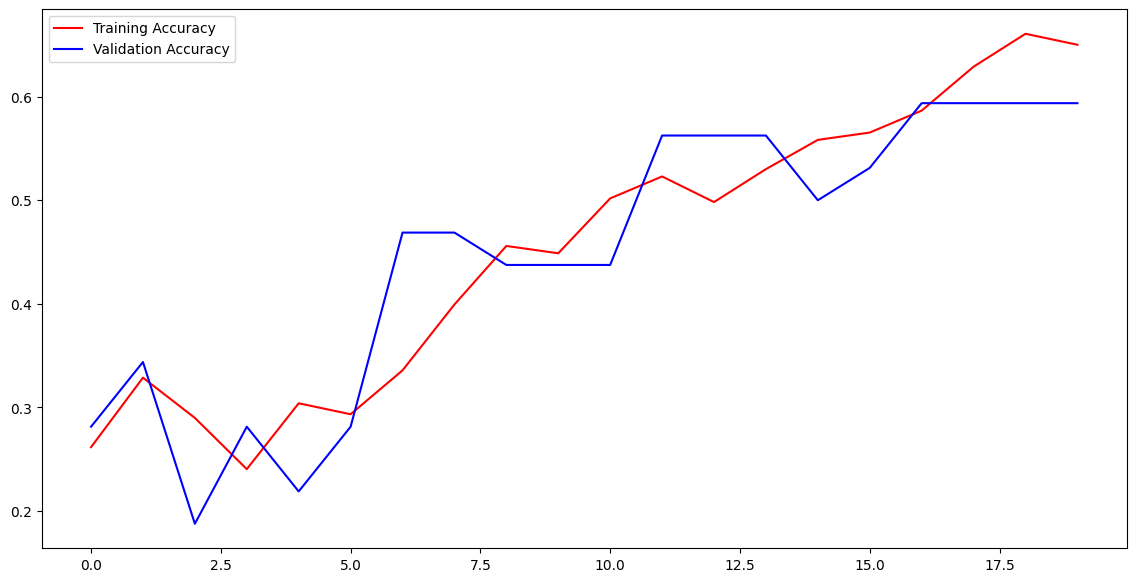

In [20]:
#model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

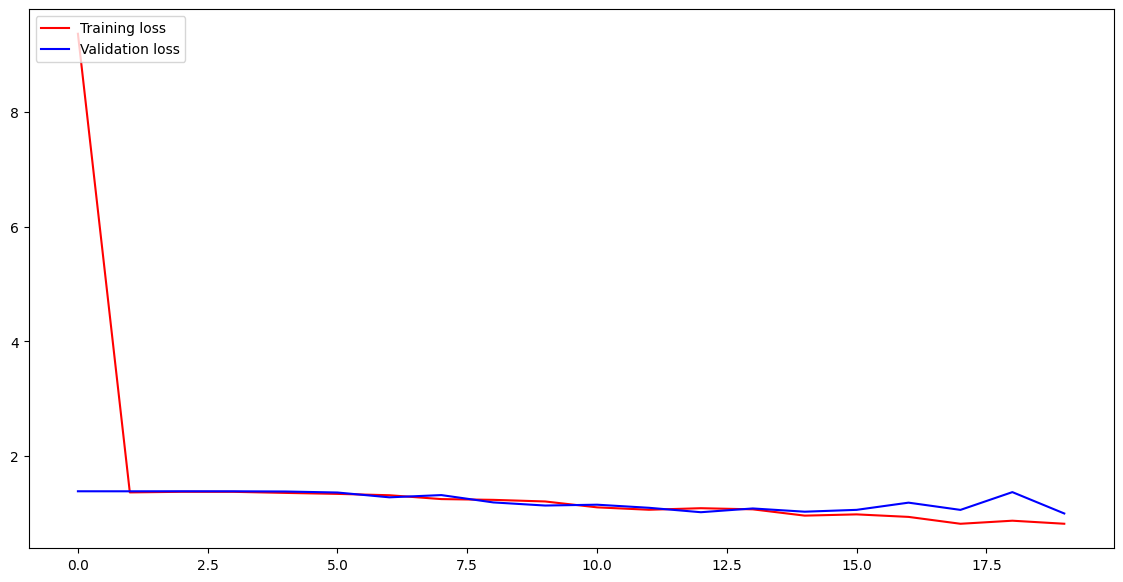

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

# Prediction

In [23]:
img = cv2.imread("Data/BrainTumor/meningioma_tumor/image(127).jpg")
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [24]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

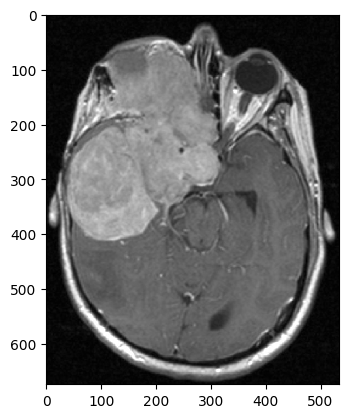

In [36]:
from tensorflow.keras.preprocessing import image
img = image.load_img("Data/BrainTumor/meningioma_tumor/image(127).jpg")
plt.imshow(img,interpolation='nearest')
plt.show()

In [28]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


2

In [16]:
import tensorflow as tf
import cv2
import numpy as np

# Load the image
image_path = "Data/BrainTumor/no_tumor/image(21).jpg"
img = cv2.imread(image_path)
img = cv2.resize(img, (150, 150))
img_array = np.array(img).reshape(1, 150, 150, 3)

# Load the model
model = tf.keras.models.load_model("braintumorV2.h5")

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class = np.argmax(predictions)

# Define your labels
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Get the predicted class label
predicted_label = labels[predicted_class]

# Print the predicted class index and label
print("Predicted class index:", predicted_class)
print("Predicted class label:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Predicted class index: 2
Predicted class label: no_tumor


In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model, save_model

# Your model definition
model = tf.keras.models.load_model("braintumorV2.h5")

# Save the model using TensorFlow Keras
save_model(model, 'braintumorV3.h5')


In [6]:
import os
import tensorflow as tf
import numpy as np

import cv2
from tensorflow.keras.models import load_model  # Use TensorFlow Keras
from flask import Flask, request, render_template
from werkzeug.utils import secure_filename

app = Flask(__name__)

# Suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

model = load_model('braintumorV3.h5', compile=False)  # Load the model without compilation
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
image_path = "Data/BrainTumor/meningioma_tumor/image(23).jpg"
img = cv2.imread(image_path)
img = cv2.resize(img, (150, 150))
img_array = np.array(img).reshape(1, 150, 150, 3)
# Make predictions
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
predicted_label = labels[predicted_class]

# Print the predicted class index and label
print("Predicted class index:", predicted_class)
print("Predicted class label:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
Predicted class index: 1
Predicted class label: meningioma_tumor
